# Twitter Classification - Hackathon

### Team Members:
- Akhil Venugopal (avgopal@iu.edu)
- Bhawna Mishra (bhmish@iu.edu)
- Sumitha Vellinalur Thattai (svtranga@iu.edu)

## ReadMe

**Packages Used** - Numpy, Seaborn, Pandas, Matplotlib, Spacy, sklearn, Counter, en_core_web_sm

**Models Used** - Logistic Regression, Random Forest Classifier, Bernoulli NB, Guassian NB, LDA, KNN, SVC, Decision Tree


**How to run the file** - Install spacy and en_core_web_sm and run the below cells

**Command to install packages** -
- Spacy - !pip install spacy
- en_core_web_sm - !pip install en_core_web_sm

### Link to Video Presentation - https://youtu.be/aOAManzDLXs

### EDA of the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#Reading the training data
df = pd.read_csv('train_dataset.csv')

In [2]:
df.head()

,Unnamed: 0,Unnamed: 0.1,key,ID,create_date,user,userID,RT_TF,full_text,Sample.ID.x,...,Calling.Out.x,Calling.Out.y,Is.About.the.Holocaust.x,Is.About.the.Holocaust.y,IHRA.Section.x,IHRA.Section.y,sample_name,Is.About.The.Holocaust.x,Is.About.The.Holocaust.y,Target
0,2454,2454,JewNAS,1.232290e+18,Tue Feb 25 07:54:26 -0500 2020,Leafy13222544,1.209270e+18,True,@ShaKeeL__007 @marksul44 @P3ng1z @BernieSander...,366,...,1,0,0.0,0.0,13,13,Jews2020Jan-Apr.rep2,NaN,NaN,0
1,870,870,JewAS,1.272910e+18,Tue Jun 16 11:13:24 -0400 2020,sharonka3,9.752547e+08,True,This is a perfect example of how Jews across N...,68,...,0,0,NaN,NaN,2,2,Jews2020May-Aug.rep1.rep1,0.0,0.0,1
2,763,763,JewAS,1.233040e+18,Thu Feb 27 09:53:39 -0500 2020,SpruceYelverton,1.114823e+09,True,Jews were the major cotton traders &amp; had n...,49,...,0,0,0.0,0.0,2,2,Jews2020Jan-Apr.rep1,NaN,NaN,1
3,3744,3744,KikesAS,1.202940e+18,Fri Dec 06 08:25:54 -0500 2019,plive_calmer,8.404970e+17,False,🙊 I bet #randum The media's slanted view of ki...,45,...,1,1,0.0,0.0,0,0,kikes2019.rep1,NaN,NaN,1
4,1525,1525,JewNAS,1.168870e+18,Tue Sep 03 08:53:53 -0400 2019,emzeekg,2.975341e+09,True,21 year old Palestinian woman murdered by her ...,186,...,0,1,0.0,0.0,13,13,Jews2019.rep2,NaN,NaN,0


In [3]:
df.key.value_counts()

JewNAS        1763
IsraelNAS      505
ZioNaziAS      365
JewAS          222
KikesNAS       150
KikesAS         79
IsraelAS        77
ZioNaziNAS      55
Name: key, dtype: int64

In [4]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,ID,userID,Sample.ID.x,Sample.ID.y,Sentiment.Rating.x,Sentiment.Rating.y,Calling.Out.x,Calling.Out.y,Is.About.the.Holocaust.x,Is.About.the.Holocaust.y,IHRA.Section.x,IHRA.Section.y,Is.About.The.Holocaust.x,Is.About.The.Holocaust.y,Target
count,3216.000000,3216.000000,3.216000e+03,3.216000e+03,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,2264.000000,2264.000000,3216.000000,3216.000000,952.000000,952.000000,3216.000000
mean,1999.877799,1999.877799,1.215330e+18,4.117402e+17,242.249378,242.249378,2.768035,2.707090,0.281405,0.204913,0.105565,0.072880,11.282649,11.077114,0.107143,0.093487,0.231032
std,1168.858979,1168.858979,6.075276e+16,5.062683e+17,144.527845,144.527845,0.637587,0.742841,0.449755,0.403701,0.307348,0.259997,3.527015,3.973351,0.309457,0.291267,0.421559
min,0.000000,0.000000,1.079900e+18,1.994321e+06,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,982.500000,982.500000,1.167218e+18,2.608568e+08,118.000000,118.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,10.000000,13.000000,0.000000,0.000000,0.000000
50%,1990.000000,1990.000000,1.225400e+18,2.742042e+09,237.000000,237.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,13.000000,13.000000,0.000000,0.000000,0.000000
75%,3023.500000,3023.500000,1.266368e+18,9.545080e+17,366.250000,366.250000,3.000000,3.000000,1.000000,0.000000,0.000000,0.000000,13.000000,13.000000,0.000000,0.000000,0.000000
max,4018.000000,4018.000000,1.300530e+18,1.294950e+18,500.000000,500.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,13.000000,13.000000,1.000000,1.000000,1.000000


#### Drop null values:

In [5]:
df.isnull().sum()

Unnamed: 0                     0
Unnamed: 0.1                   0
key                            0
ID                             0
create_date                    0
user                           0
userID                         0
RT_TF                          0
full_text                      0
Sample.ID.x                    0
Sample.ID.y                    0
Still.Exists.x                 0
Still.Exists.y                 0
In.English.x                   0
In.English.y                   0
Sarcasm.x                      0
Sarcasm.y                      0
Additional.Comments.x          0
Additional.Comments.y          0
User.x                         0
User.y                         0
Disagree.With.x                0
Disagree.With.y                0
Sentiment.Rating.x             0
Sentiment.Rating.y             0
Calling.Out.x                  0
Calling.Out.y                  0
Is.About.the.Holocaust.x     952
Is.About.the.Holocaust.y     952
IHRA.Section.x                 0
IHRA.Secti

In [6]:
df.drop(['Is.About.the.Holocaust.x', 'Is.About.the.Holocaust.y', 'Is.About.The.Holocaust.x', 'Is.About.The.Holocaust.y'],axis = 1, inplace=True)

In [7]:
df.drop(['User.x', 'User.y','Sample.ID.x', 'Sample.ID.y','ID', 'Unnamed: 0.1' ],axis = 1, inplace=True)

In [8]:
df.set_index(['Unnamed: 0'])

,key,create_date,user,userID,RT_TF,full_text,Still.Exists.x,Still.Exists.y,In.English.x,In.English.y,...,Disagree.With.x,Disagree.With.y,Sentiment.Rating.x,Sentiment.Rating.y,Calling.Out.x,Calling.Out.y,IHRA.Section.x,IHRA.Section.y,sample_name,Target
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2454,JewNAS,Tue Feb 25 07:54:26 -0500 2020,Leafy13222544,1.209270e+18,True,@ShaKeeL__007 @marksul44 @P3ng1z @BernieSander...,True,True,True,True,...,False,False,3,3,1,0,13,13,Jews2020Jan-Apr.rep2,0
870,JewAS,Tue Jun 16 11:13:24 -0400 2020,sharonka3,9.752547e+08,True,This is a perfect example of how Jews across N...,True,True,True,True,...,False,False,2,2,0,0,2,2,Jews2020May-Aug.rep1.rep1,1
763,JewAS,Thu Feb 27 09:53:39 -0500 2020,SpruceYelverton,1.114823e+09,True,Jews were the major cotton traders &amp; had n...,True,True,True,True,...,False,False,2,2,0,0,2,2,Jews2020Jan-Apr.rep1,1
3744,KikesAS,Fri Dec 06 08:25:54 -0500 2019,plive_calmer,8.404970e+17,False,🙊 I bet #randum The media's slanted view of ki...,True,True,True,True,...,False,False,2,2,1,1,0,0,kikes2019.rep1,1
1525,JewNAS,Tue Sep 03 08:53:53 -0400 2019,emzeekg,2.975341e+09,True,21 year old Palestinian woman murdered by her ...,True,True,True,True,...,False,False,3,3,0,1,13,13,Jews2019.rep2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,JewNAS,Thu Sep 19 20:46:33 -0400 2019,allen_rl,3.490296e+08,False,I Agree!!! Too much Islam!!!!Stop defamation o...,True,True,True,True,...,False,False,3,3,0,0,13,13,Jews2019.rep2,0
3547,ZioNaziAS,Thu Jan 02 22:42:30 -0500 2020,SCynyrd,4.879780e+09,False,Another zionazi pogrom,True,True,True,True,...,False,False,3,1,0,0,10,10,ZioNazi2020Jan-Apr.rep2,1
1125,JewNAS,Fri May 31 10:56:41 -0400 2019,grendyll,1.894299e+07,True,Paul Nehlen is a white supremacist who wants t...,True,True,True,True,...,False,False,3,3,1,0,13,13,Jews2019.rep1,0


#### Update the data type of the columns

In [9]:
df['RT_TF'] = df['RT_TF'].astype(int)
df['Still.Exists.x'] = df['Still.Exists.x'].astype(int)
df['Still.Exists.y'] = df['Still.Exists.y'].astype(int)
df['In.English.x'] = df['In.English.x'].astype(int)
df['In.English.y'] = df['In.English.y'].astype(int)
df['Sarcasm.x'] = df['Sarcasm.x'].astype(int)
df['Sarcasm.y'] = df['Sarcasm.y'].astype(int)
df['Disagree.With.x'] = df['Disagree.With.x'].astype(int)
df['Disagree.With.y'] = df['Disagree.With.y'].astype(int)

In [10]:
df.dtypes

Unnamed: 0                 int64
key                       object
create_date               object
user                      object
userID                   float64
RT_TF                      int32
full_text                 object
Still.Exists.x             int32
Still.Exists.y             int32
In.English.x               int32
In.English.y               int32
Sarcasm.x                  int32
Sarcasm.y                  int32
Additional.Comments.x     object
Additional.Comments.y     object
Disagree.With.x            int32
Disagree.With.y            int32
Sentiment.Rating.x         int64
Sentiment.Rating.y         int64
Calling.Out.x              int64
Calling.Out.y              int64
IHRA.Section.x             int64
IHRA.Section.y             int64
sample_name               object
Target                     int64
dtype: object

#### Split the 'create_date' column to store the year, month and date seperately

In [11]:
month_labels = {'Jan':1, 'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,
               'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
df['year'] = df['create_date'].str[-4:]
df['month'] = df['create_date'].str[4:7]
df['month'] = df['month'].apply(lambda x: month_labels[x])
df['date'] = pd.to_datetime(df[['year', 'month']].assign(DAY=1))
df['date']= pd.to_datetime(df['date'])
df.head()


,Unnamed: 0,key,create_date,user,userID,RT_TF,full_text,Still.Exists.x,Still.Exists.y,In.English.x,...,Sentiment.Rating.y,Calling.Out.x,Calling.Out.y,IHRA.Section.x,IHRA.Section.y,sample_name,Target,year,month,date
0,2454,JewNAS,Tue Feb 25 07:54:26 -0500 2020,Leafy13222544,1.209270e+18,1,@ShaKeeL__007 @marksul44 @P3ng1z @BernieSander...,1,1,1,...,3,1,0,13,13,Jews2020Jan-Apr.rep2,0,2020,2,2020-02-01
1,870,JewAS,Tue Jun 16 11:13:24 -0400 2020,sharonka3,9.752547e+08,1,This is a perfect example of how Jews across N...,1,1,1,...,2,0,0,2,2,Jews2020May-Aug.rep1.rep1,1,2020,6,2020-06-01
2,763,JewAS,Thu Feb 27 09:53:39 -0500 2020,SpruceYelverton,1.114823e+09,1,Jews were the major cotton traders &amp; had n...,1,1,1,...,2,0,0,2,2,Jews2020Jan-Apr.rep1,1,2020,2,2020-02-01
3,3744,KikesAS,Fri Dec 06 08:25:54 -0500 2019,plive_calmer,8.404970e+17,0,🙊 I bet #randum The media's slanted view of ki...,1,1,1,...,2,1,1,0,0,kikes2019.rep1,1,2019,12,2019-12-01
4,1525,JewNAS,Tue Sep 03 08:53:53 -0400 2019,emzeekg,2.975341e+09,1,21 year old Palestinian woman murdered by her ...,1,1,1,...,3,0,1,13,13,Jews2019.rep2,0,2019,9,2019-09-01


#### Plot the counts of 0's and 1's in the 'Target' column

<AxesSubplot:xlabel='Target', ylabel='count'>

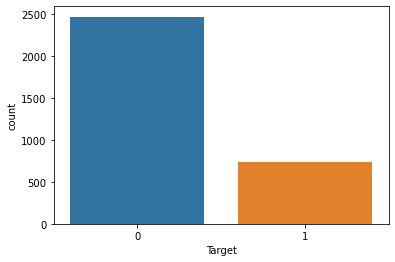

In [12]:
import seaborn as sns
sns.countplot(data = df,x = 'Target')

### We see that there is a class imbalance. So we will be doing upsampling to overcome this

In [13]:
g1_x = pd.DataFrame(df[['Sentiment.Rating.x','Target']].value_counts().groupby(level = 1).transform(lambda x: x/x.sum()))
g1_x.reset_index(inplace = True)
g1_x.sort_values(by = 'Target', inplace = True)
g1x_new = g1_x.pivot(index = 'Target' ,columns = 'Sentiment.Rating.x', values = 0)
g1x_new

Sentiment.Rating.x,1,2,3,4,5
Target,,,,,
0,0.015770,0.054590,0.881116,0.043267,0.005257
1,0.242261,0.414536,0.340511,0.002692,NaN


#### Plot a bar graph of Difference between AS and NAS as a function of Sentiment Rating (Annotator X)

Text(0.5, 1.0, 'Sentiment Rating (Annotator X) vs Classification')

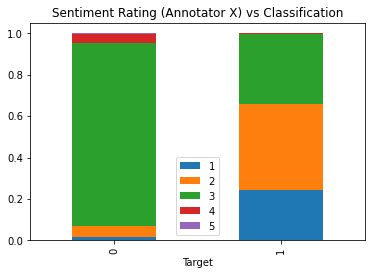

In [14]:
g1x_new.plot(kind='bar', stacked = True)
plt.legend(loc='best')
plt.title('Sentiment Rating (Annotator X) vs Classification')

In [15]:
g1_y = pd.DataFrame(df[['Sentiment.Rating.y','Target']].value_counts().groupby(level = 1).transform(lambda x: x/x.sum()))
g1_y.reset_index(inplace = True)
g1_y.sort_values(by = 'Target', inplace = True)
g1y_new = g1_y.pivot(index = 'Target' ,columns = 'Sentiment.Rating.y', values = 0)
g1y_new

Sentiment.Rating.y,1,2,3,4,5
Target,,,,,
0,0.018197,0.027093,0.897695,0.048928,0.008087
1,0.438762,0.398385,0.160162,0.002692,NaN


#### Plot a bar graph of Classification as a function of Sentiment Rating (Annotator Y)

Text(0.5, 1.0, 'Sentiment Rating (Annotator Y) vs Classification')

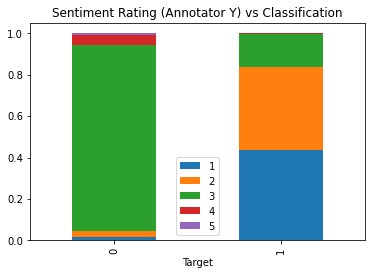

In [16]:
g1y_new.plot(kind='bar', stacked = True)
plt.legend(loc='best')
plt.title('Sentiment Rating (Annotator Y) vs Classification')

#### Annotator Y rate the anti semitic tweets to be highly negative than Annotator X

In [17]:
g2_x = pd.DataFrame(df[['IHRA.Section.x','Target']].value_counts().groupby(level = 1).transform(lambda x: x/x.sum()))
g2_x.reset_index(inplace = True)
g2_x.sort_values(by = 'Target', inplace = True)
g2x_new = g2_x.pivot(index = 'Target' ,columns = 'IHRA.Section.x', values = 0)
g2x_new

IHRA.Section.x,0,1,2,3,4,5,6,7,9,10,11,13
Target,,,,,,,,,,,,
0,0.000404,0.000404,0.010918,NaN,0.016175,0.000404,0.000404,0.004044,0.000404,NaN,NaN,0.966842
1,0.092867,0.014805,0.224764,0.008075,0.020188,0.005384,0.004038,0.111709,0.024226,0.479139,0.006729,0.008075


#### Plot a bar graph of Classification as a function of IHRA Rating (Annotator X)

Text(0.5, 1.0, 'IHRA Rating (Annotator X) vs Classification')

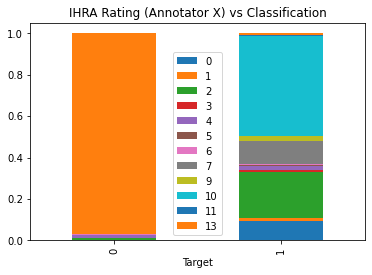

In [18]:
g2x_new.plot(kind='bar', stacked = True)
plt.legend(loc='best')
plt.title('IHRA Rating (Annotator X) vs Classification')

In [19]:
g2_y = pd.DataFrame(df[['IHRA.Section.y','Target']].value_counts().groupby(level = 1).transform(lambda x: x/x.sum()))
g2_y.reset_index(inplace = True)
g2_y.sort_values(by = 'Target', inplace = True)
g2y_new = g2_y.pivot(index = 'Target' ,columns = 'IHRA.Section.y', values = 0)
g2y_new

IHRA.Section.y,0,1,2,3,4,5,6,7,8,9,10,11,13
Target,,,,,,,,,,,,,
0,NaN,NaN,0.000809,NaN,0.000809,NaN,NaN,0.000809,NaN,0.000404,NaN,NaN,0.997169
1,0.168237,0.020188,0.325707,0.02288,0.018843,0.008075,0.008075,0.165545,0.004038,0.017497,0.191117,0.02961,0.020188


#### Plot a bar graph of Classification as a function of IHRA Rating (Annotator Y)

Text(0.5, 1.0, 'IHRA Rating (Annotator Y) vs Classification')

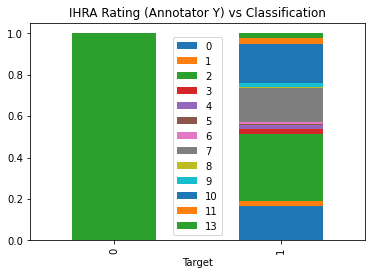

In [20]:
g2y_new.plot(kind='bar', stacked = True)
plt.legend(loc='best')
plt.title('IHRA Rating (Annotator Y) vs Classification')

In [21]:
df.columns

Index(['Unnamed: 0', 'key', 'create_date', 'user', 'userID', 'RT_TF',
       'full_text', 'Still.Exists.x', 'Still.Exists.y', 'In.English.x',
       'In.English.y', 'Sarcasm.x', 'Sarcasm.y', 'Additional.Comments.x',
       'Additional.Comments.y', 'Disagree.With.x', 'Disagree.With.y',
       'Sentiment.Rating.x', 'Sentiment.Rating.y', 'Calling.Out.x',
       'Calling.Out.y', 'IHRA.Section.x', 'IHRA.Section.y', 'sample_name',
       'Target', 'year', 'month', 'date'],
      dtype='object')

In [22]:
g3_x = pd.DataFrame(df[['Sarcasm.x','Target']].value_counts().groupby(level = 1).transform(lambda x: x/x.sum()))
g3_x.reset_index(inplace = True)
g3_x.sort_values(by = 'Target', inplace = True)
g3x_new = g3_x.pivot(index = 'Target' ,columns = 'Sarcasm.x', values = 0)
g3x_new

Sarcasm.x,0,1
Target,,
0,0.978569,0.021431
1,0.989233,0.010767


#### Plot a bar graph of Classification as a function of Sarcasm (Annotator X)

Text(0.5, 1.0, 'Sarcasm (Annotator X) vs Classification')

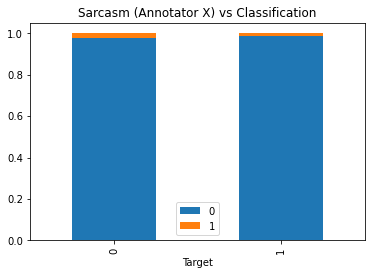

In [23]:
g3x_new.plot(kind='bar', stacked = True)
plt.legend(loc='best')
plt.title('Sarcasm (Annotator X) vs Classification')

In [24]:
g3_y = pd.DataFrame(df[['Sarcasm.y','Target']].value_counts().groupby(level = 1).transform(lambda x: x/x.sum()))
g3_y.reset_index(inplace = True)
g3_y.sort_values(by = 'Target', inplace = True)
g3y_new = g3_y.pivot(index = 'Target' ,columns = 'Sarcasm.y', values = 0)
g3y_new

Sarcasm.y,0,1
Target,,
0,0.977760,0.022240
1,0.983849,0.016151


#### Plot a bar graph of Classification as a function of Sarcasm (Annotator Y)

Text(0.5, 1.0, 'Sarcasm (Annotator Y) vs Classification')

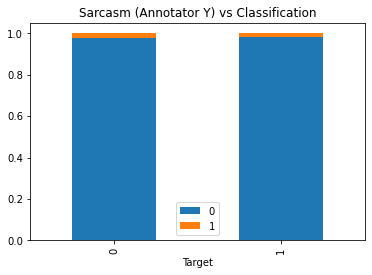

In [25]:
g3y_new.plot(kind='bar', stacked = True)
plt.legend(loc='best')
plt.title('Sarcasm (Annotator Y) vs Classification')

In [26]:
gb = pd.DataFrame(df[['date','key']].value_counts())
gb.reset_index(inplace = True)
gb.sort_values(by = 'date', inplace = True)
gb.head()

,date,key,0
109,2018-12-01,JewNAS,1
68,2019-01-01,KikesNAS,9
76,2019-01-01,KikesAS,6
79,2019-01-01,JewAS,6
44,2019-01-01,ZioNaziAS,19


In [27]:
gb.set_index(['date'], inplace = True)

In [28]:
gb.iloc[:,-2].value_counts()

JewNAS        21
JewAS         20
ZioNaziAS     16
ZioNaziNAS    13
KikesAS       12
KikesNAS      12
IsraelNAS      8
IsraelAS       8
Name: key, dtype: int64

## Plotting graphs to identify any variation in the usage of pejorative terms and slurs 

#### Plot a graph to show the Usage of generic words over a period of time

Text(0.5, 1.0, 'Usage of Generic Words Over Time')

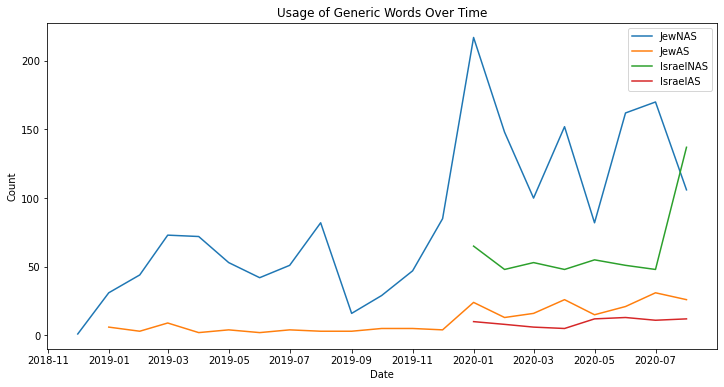

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.xlabel('Date')
plt.ylabel('Count')
plt.plot(gb[gb['key']=='JewNAS'].iloc[:,-1], label = 'JewNAS')
plt.plot(gb[gb['key']=='JewAS'].iloc[:,-1], label = 'JewAS')
plt.plot(gb[gb['key']=='IsraelNAS'].iloc[:,-1], label = 'IsraelNAS')
plt.plot(gb[gb['key']=='IsraelAS'].iloc[:,-1], label = 'IsraelAS')
plt.legend()
plt.title('Usage of Generic Words Over Time')

### We see that the usage of jews started to peak in 2020. Usage of Israel began starting 2020.

#### Plot a graph to show the Usage of slur words over a period of time

Text(0.5, 1.0, 'Usage of Slur Words Over Time')

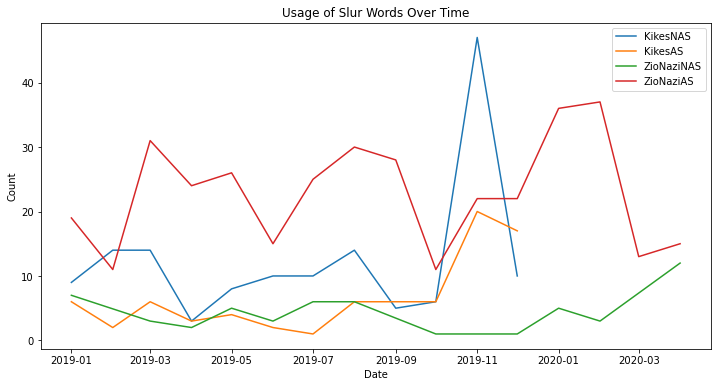

In [30]:
plt.figure(figsize=(12,6))
plt.xlabel('Date')
plt.ylabel('Count')
plt.plot(gb[gb['key']=='KikesNAS'].iloc[:,-1], label = 'KikesNAS')
plt.plot(gb[gb['key']=='KikesAS'].iloc[:,-1], label = 'KikesAS')
plt.plot(gb[gb['key']=='ZioNaziNAS'].iloc[:,-1], label = 'ZioNaziNAS')
plt.plot(gb[gb['key']=='ZioNaziAS'].iloc[:,-1], label = 'ZioNaziAS')
plt.legend()
plt.title('Usage of Slur Words Over Time')

###  Usage of Kikes peaked in Nov 2019 and then dropped to zero. Usage of Nazi increased every alternate month

#### Find the correlations between columns

In [31]:
import seaborn as sns
plt.figure(figsize=(12,6))
cor = df.corr()
cor['Target'].sort_values()

IHRA.Section.y       -0.872644
IHRA.Section.x       -0.729260
Sentiment.Rating.y   -0.723462
Sentiment.Rating.x   -0.571269
RT_TF                -0.281357
Calling.Out.x        -0.198643
Calling.Out.y        -0.148500
Still.Exists.x       -0.124562
Still.Exists.y       -0.115336
Disagree.With.x      -0.047500
Sarcasm.x            -0.032951
Sarcasm.y            -0.017971
Disagree.With.y      -0.016569
month                 0.046337
userID                0.088735
Unnamed: 0            0.163121
Target                1.000000
In.English.x               NaN
In.English.y               NaN
Name: Target, dtype: float64

<Figure size 864x432 with 0 Axes>

#### We see that IHRA and sentiment rating has the highest correlation with out target variable

#### Perform One hot encoding to convert the categorical variables for better prediction

In [32]:
from sklearn.preprocessing import OneHotEncoder

cat_features = df[['key']]
                  #'IHRA.Section.x','IHRA.Section.y', 'Sentiment.Rating.x', 'Sentiment.Rating.y']]
ohe1 = OneHotEncoder( handle_unknown = 'ignore')
df_ohe = ohe1.fit_transform(cat_features)
df[ohe1.categories_[0]] =  df_ohe.toarray()

In [33]:
cat_features = df[['IHRA.Section.x']]
                  #'IHRA.Section.x','IHRA.Section.y', 'Sentiment.Rating.x', 'Sentiment.Rating.y']]
ohe2 = OneHotEncoder(handle_unknown = 'ignore')
df_ohe = ohe2.fit_transform(cat_features)
df[ohe2.categories_[0]+1] =  df_ohe.toarray()

In [34]:
cat_features = df[['IHRA.Section.y']]
                  #'IHRA.Section.x','IHRA.Section.y', 'Sentiment.Rating.x', 'Sentiment.Rating.y']]
ohe3 = OneHotEncoder(handle_unknown = 'ignore')
df_ohe = ohe3.fit_transform(cat_features)
df[ohe3.categories_[0]+12] =  df_ohe.toarray()

In [35]:
cat_features = df[['Sentiment.Rating.x']]
                  #'IHRA.Section.x','IHRA.Section.y', 'Sentiment.Rating.x', 'Sentiment.Rating.y']]
ohe4 = OneHotEncoder(handle_unknown = 'ignore')
df_ohe = ohe4.fit_transform(cat_features)
df[ohe4.categories_[0]+123] =  df_ohe.toarray()

In [36]:
cat_features = df[['Sentiment.Rating.y']]
                  #'IHRA.Section.x','IHRA.Section.y', 'Sentiment.Rating.x', 'Sentiment.Rating.y']]
ohe5 = OneHotEncoder(handle_unknown = 'ignore')
df_ohe = ohe5.fit_transform(cat_features)
df[ohe5.categories_[0]+1234] =  df_ohe.toarray()

In [37]:
#data = pd.get_dummies(df, columns = ['key', 'IHRA.Section.x','IHRA.Section.y', 'Sentiment.Rating.x', 'Sentiment.Rating.y'])

#### Drop the unnecessary columns

In [38]:
df.drop(['key', 'IHRA.Section.x','IHRA.Section.y', 'Sentiment.Rating.x', 'Sentiment.Rating.y'], axis = 1, inplace = True)

In [39]:
df.head()

,Unnamed: 0,create_date,user,userID,RT_TF,full_text,Still.Exists.x,Still.Exists.y,In.English.x,In.English.y,...,124,125,126,127,128,1235,1236,1237,1238,1239
0,2454,Tue Feb 25 07:54:26 -0500 2020,Leafy13222544,1.209270e+18,1,@ShaKeeL__007 @marksul44 @P3ng1z @BernieSander...,1,1,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,870,Tue Jun 16 11:13:24 -0400 2020,sharonka3,9.752547e+08,1,This is a perfect example of how Jews across N...,1,1,1,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,763,Thu Feb 27 09:53:39 -0500 2020,SpruceYelverton,1.114823e+09,1,Jews were the major cotton traders &amp; had n...,1,1,1,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3744,Fri Dec 06 08:25:54 -0500 2019,plive_calmer,8.404970e+17,0,🙊 I bet #randum The media's slanted view of ki...,1,1,1,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1525,Tue Sep 03 08:53:53 -0400 2019,emzeekg,2.975341e+09,1,21 year old Palestinian woman murdered by her ...,1,1,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### From the class graph, we saw that there was class imbalance, so we upsample to overcome this

In [40]:
#pip install en_core_web_sm

In [41]:
import spacy
from collections import Counter

In [42]:
import en_core_web_sm
nlp = en_core_web_sm.load()

#### Create new columnns to get the prominent categories

In [43]:
df['Person'] = ''
df['Org'] = ''
df['Location'] = ''
df['GPE'] = ''

In [44]:
import spacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

#### Update the prominent categories column of the text contains it 

In [45]:
i = 0
for text in df.full_text:
    text = nlp(text)
    
    entity = []
    for word in text.ents:
        entity.append(word.label_)
    temp = 0
    if 'PERSON' in entity:
        temp = 1
    df.at[i, 'Person'] = temp
    temp = 0
    if 'ORG' in entity:
        temp = 1
    df.at[i, 'Org'] = temp
    temp = 0
    if 'LOC' in entity:
        temp = 1
    df.at[i, 'Location'] = temp
    temp = 0
    if 'NORP' in entity:
        temp = 1
    df.at[i, 'GPE'] = temp
    i+=1

In [46]:
count_class_0, count_class_1 = df.Target.value_counts()
df_class_0 = df.loc[df.Target == 0].copy()
df_class_1 = df.loc[df.Target == 1].copy()

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df.Target.value_counts())

Random over-sampling:
0    2473
1    2473
Name: Target, dtype: int64


In [47]:
data = df.copy()

In [48]:
X = data.drop(['Target','date', 'create_date', 'user','userID','full_text','Additional.Comments.x','Additional.Comments.y', 'sample_name'], axis = 1)
y = data['Target']

#### Create a data frame to store the results

In [49]:
results_log = pd.DataFrame(columns=["Model", "Train Accuracy", "Test Accuracy"])

#### Use Standard Scalar to scale the values in order to change raw feature vectors into a representation that is more suitable for the downstream estimators

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)
scalar = StandardScaler()
scalar.fit_transform(X_train)
scalar.fit(X_test)

StandardScaler()

In [52]:
import numpy as np
np.random.seed(42)

#### We will use Logistic regression as our baseline model

In [53]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(penalty = 'l1', solver = 'saga')

In [54]:
lg.fit(X_train, y_train)

C:\Users\bhawn\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(penalty='l1', solver='saga')

In [55]:
from sklearn.metrics import accuracy_score
y_pred = lg.predict(X_train)
train_acc = accuracy_score(y_train, y_pred)*100

In [56]:
y_pred_test = lg.predict(X_test)
test_acc = accuracy_score(y_test, y_pred_test)*100
results_log.loc[len(results_log)] = ["Logistic Regression (Baseline)", np.round(train_acc, 3),np.round(test_acc, 3)]

#### We will perform classification using Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier()


In [58]:
rfclf.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
from sklearn.metrics import accuracy_score
y_pred = rfclf.predict(X_train)
train_acc = accuracy_score(y_train, y_pred)*100

In [60]:
y_pred_test = rfclf.predict(X_test)
test_acc = accuracy_score(y_test, y_pred_test)*100
results_log.loc[len(results_log)] = ["Random Forest", np.round(train_acc, 3),np.round(test_acc, 3)]

#### Bernoulli Classifier

In [61]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
nb = BernoulliNB()

In [62]:
nb.fit(X_train, y_train)

BernoulliNB()

In [63]:
y_pred = nb.predict(X_train)
train_acc = accuracy_score(y_train, y_pred)*100

In [64]:
y_pred_test = nb.predict(X_test)
test_acc = accuracy_score(y_test, y_pred_test)*100
results_log.loc[len(results_log)] = ["Bernoulli NB", np.round(train_acc, 3),np.round(test_acc, 3)]

In [65]:
results_log

,Model,Train Accuracy,Test Accuracy
0,Logistic Regression (Baseline),60.111,55.253
1,Random Forest,100.000,99.899
2,Bernoulli NB,99.570,98.889


### Performing a gridsearch of all classifier and checking for mean and standard deviations score

C:\Users\bhawn\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\bhawn\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\bhawn\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\bhawn\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\bhawn\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

LR: 0.600369 (0.031956)
LDA: 0.991659 (0.003207)
KNN: 0.998989 (0.001676)
CART: 0.999495 (0.001010)
RF: 0.999494 (0.001011)
GNB: 0.998989 (0.001239)
BNB: 0.995197 (0.003824)
SVM: 0.713093 (0.015270)


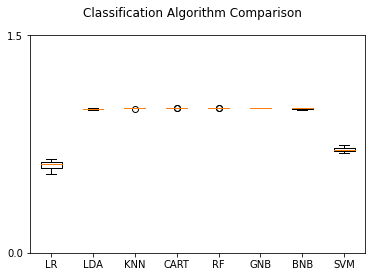

In [66]:
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

results = []
names = []
scoring = 'accuracy'

# Create a pipeline
clf_pipe = Pipeline([('clf', None)]) # Placeholder Estimator
    
# Candidate learning estimators
estimators = [{'clf': [LogisticRegression(penalty = 'l1', solver = 'saga')]},
                {'clf': [LinearDiscriminantAnalysis()]},
                {'clf': [KNeighborsClassifier()]},
                {'clf': [DecisionTreeClassifier()]},
                  {'clf' : [RandomForestClassifier()]},
                {'clf': [GaussianNB()]},
                {'clf': [BernoulliNB()]},
                {'clf': [SVC()]},
               ]

name = ['LR','LDA','KNN','CART','RF','GNB','BNB','SVM']

# Create grid search 


#==================================================#
#               Your code starts here              #
#==================================================#
# Create grid search using the pipeline and estimators as the parametes, 
#use cv = 10 and 'accuracy' for the scoring parameter
clf_gridsearch = GridSearchCV(clf_pipe, param_grid = estimators, cv = 10, scoring=scoring)
#TODO:complete the gridsearch code
#clf_gridsearch = GridSearchCV...
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#


clf_gridsearch.fit(X_train, y_train)

results_df = pd.DataFrame(clf_gridsearch.cv_results_)
results_df = results_df.T
#display(results_df)

for i in range(0,8):
    results.append(results_df[i][6:16].to_list())
    msg = "%s: %f (%f)" % (name[i], np.mean(results[i]), np.std(results[i]))
    print(msg)
    
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Classification Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(name)
ax.set_yticks([0,1.5])
pyplot.show()


#### As RF has minimal standard deviation, we will perform Randomized Grid Search on it to find the best parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }


forest_clf = RandomForestClassifier(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
rnd_search = RandomizedSearchCV(forest_clf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy', random_state=42)
rnd_search.fit(X_train, y_train)

In [ ]:
rnd_search.best_params_

In [ ]:
rnd_search.best_estimator_

In [ ]:
from sklearn.ensemble import RandomForestClassifier
best_classifier = rnd_search.best_estimator_

In [ ]:
best_classifier.fit(X_train, y_train)

In [ ]:
y_pred = best_classifier.predict(X_train)
train_acc = accuracy_score(y_train, y_pred)*100

In [ ]:
y_pred_test = best_classifier.predict(X_test)
test_acc = accuracy_score(y_test, y_pred_test)*100
results_log.loc[len(results_log)] = ["Random Forest with best parameters", np.round(train_acc, 3),np.round(test_acc, 3)]

In [ ]:
results_log

# Predicting the test dataset using the best model

In [ ]:
import pandas as pd
new_test_data = pd.read_csv('test_dataset.csv')
data_index = new_test_data.index
new_test_data.head()

In [ ]:
new_test_data.drop(['Is.About.the.Holocaust.x', 'Is.About.the.Holocaust.y', 'Is.About.The.Holocaust.x', 'Is.About.The.Holocaust.y'],axis = 1, inplace=True)
new_test_data.drop(['User.x', 'User.y','Sample.ID.x', 'Sample.ID.y','ID', 'Unnamed: 0.1' ],axis = 1, inplace=True)
new_test_data['RT_TF'] = new_test_data['RT_TF'].astype(int)
new_test_data['Still.Exists.x'] = new_test_data['Still.Exists.x'].astype(int)
new_test_data['Still.Exists.y'] = new_test_data['Still.Exists.y'].astype(int)
new_test_data['In.English.x'] = new_test_data['In.English.x'].astype(int)
new_test_data['In.English.y'] = new_test_data['In.English.y'].astype(int)
new_test_data['Sarcasm.x'] = new_test_data['Sarcasm.x'].astype(int)
new_test_data['Sarcasm.y'] = new_test_data['Sarcasm.y'].astype(int)
new_test_data['Disagree.With.x'] = new_test_data['Disagree.With.x'].astype(int)
new_test_data['Disagree.With.y'] = new_test_data['Disagree.With.y'].astype(int)
new_test_data.set_index(['Unnamed: 0'])

### Performing all the preprocessing steps we did in the training dataset

In [ ]:
month_labels = {'Jan':1, 'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,
               'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
new_test_data['year'] = new_test_data['create_date'].str[-4:]
new_test_data['month'] = new_test_data['create_date'].str[4:7]
new_test_data['month'] = new_test_data['month'].apply(lambda x: month_labels[x])
new_test_data['date'] = pd.to_datetime(new_test_data[['year', 'month']].assign(DAY=1))
new_test_data['date']= pd.to_datetime(new_test_data['date'])
new_test_data.head()


In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_features = new_test_data[['key']]
                  #'IHRA.Section.x','IHRA.Section.y', 'Sentiment.Rating.x', 'Sentiment.Rating.y']]
df_ohe = ohe1.transform(cat_features)
new_test_data[ohe1.categories_[0]] =  df_ohe.toarray()

In [ ]:
cat_features = new_test_data[['IHRA.Section.x']]
                  #'IHRA.Section.x','IHRA.Section.y', 'Sentiment.Rating.x', 'Sentiment.Rating.y']]

df_ohe = ohe2.transform(cat_features)
new_test_data[ohe2.categories_[0]+1] =  df_ohe.toarray()

In [ ]:
cat_features = new_test_data[['IHRA.Section.y']]
                  #'IHRA.Section.x','IHRA.Section.y', 'Sentiment.Rating.x', 'Sentiment.Rating.y']]

df_ohe = ohe3.transform(cat_features)
new_test_data[ohe3.categories_[0]+12] =  df_ohe.toarray()

In [ ]:
cat_features = new_test_data[['Sentiment.Rating.x']]
                  #'IHRA.Section.x','IHRA.Section.y', 'Sentiment.Rating.x', 'Sentiment.Rating.y']]

df_ohe = ohe4.transform(cat_features)
new_test_data[ohe4.categories_[0]+123] =  df_ohe.toarray()

In [ ]:
cat_features = new_test_data[['Sentiment.Rating.y']]
                  #'IHRA.Section.x','IHRA.Section.y', 'Sentiment.Rating.x', 'Sentiment.Rating.y']]

df_ohe = ohe5.transform(cat_features)
new_test_data[ohe5.categories_[0]+1234] =  df_ohe.toarray()

In [ ]:
new_test_data['Person'] = ''
new_test_data['Org'] = ''
new_test_data['Location'] = ''
new_test_data['GPE'] = ''

In [ ]:
new_test_data.drop(['key', 'IHRA.Section.x','IHRA.Section.y', 'Sentiment.Rating.x', 'Sentiment.Rating.y'], axis = 1, inplace = True)

In [ ]:
i = 0
for text in new_test_data.full_text:
    text = nlp(text)
    
    entity = []
    for word in text.ents:
        entity.append(word.label_)
    temp = 0
    if 'PERSON' in entity:
        temp = 1
    new_test_data.at[i, 'Person'] = temp
    temp = 0
    if 'ORG' in entity:
        temp = 1
    new_test_data.at[i, 'Org'] = temp
    temp = 0
    if 'LOC' in entity:
        temp = 1
    new_test_data.at[i, 'Location'] = temp
    temp = 0
    if 'NORP' in entity:
        temp = 1
    new_test_data.at[i, 'GPE'] = temp
    i+=1

In [ ]:
new_test_data.drop(['user','create_date','date','userID','full_text','Additional.Comments.x','Additional.Comments.y', 'sample_name'], axis = 1, inplace = True)

### Making the prediction and storing the results in the output file

In [ ]:
scalar.fit(new_test_data)
predictions = best_classifier.predict(new_test_data)
res = pd.DataFrame(predictions) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = data_index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["Target"]
res.to_csv("prediction_results.csv", index = False) 